# Exploration

The data used in this notebook were found online on Free Internet Chess Server (FICS) https://www.ficsgames.org/download.html

Before exploring the data, we need to figure out how the chess library in Python works.

In [37]:
# importing the needed libraries
import pandas as pd 
import chess.pgn
import chess

* Checking how many lines the .pgn file has

In [2]:
! wc -l ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

 19191183 /Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn


* Taking a look at the format of the data, to figure out what we need and what not for our analysis

In [2]:
! head -20 ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

* Counting how many times the word 'FICSGamesDBGameNo' appears in the file, which indicates 

In [3]:
! grep FICSGamesDBGameNo ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn | wc -l

  955855


As we can observe there are 955,855 games for January 2017. 

In [38]:
# reading in the data
pgn = open("/Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn")

In order to run our analysis faster we are going to get a subset of data.

In [11]:
first_game = chess.pgn.read_game(pgn)

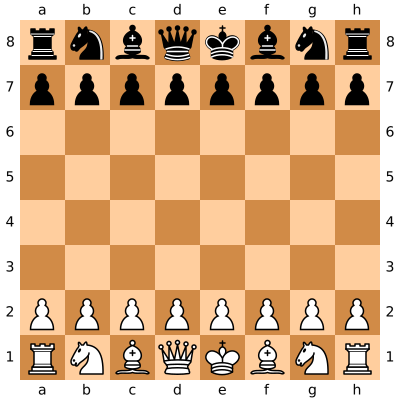

In [15]:
first_game.board()

In [14]:
for move in first_game.main_line():
    print move

d2d4
e7e5
c2c3
e5d4
c3d4
g8f6
g1f3
d7d5
c1g5
f8e7
e2e3
c8e6
a2a3
a7a6
f1d3
d8d7
e1g1
b8c6
b2b4
e8g8
b1d2
h7h6
g5h4
f6e8
h4g3
e8d6
a1c1
f8e8
f3e5
c6e5
d4e5
d6f5
d2b3
f5g3
h2g3
c7c6
f2f4
e6f5
d1c2
f5d3
c2d3
a8d8
g1f2
f7f6
e5f6
e7f6
c1d1
f6b2
b3c5
d7f7
d1d2
b2f6
f1e1
f6e7
c5b7
d8d7
b7a5
d7d6
e1e2
d6e6
a5b3
e7f6
g3g4
e6e4
b3c5
e4c4
d2c2
c4c2
e2c2
d5d4
e3e4
f6d8
g2g3
d8b6
f2f3
h6h5
g4g5
g7g6
d3d4
e8d8
d4c4
f7c4
c2c4
d8d1
f3e2
d1a1
a3a4
b6c5
b4c5
a1a4
c4a4
g8f7
a4a6
f7e6
a6c6
e6f7
c6d6
f7g7
c5c6
g7f7


In [ ]:
# creating a list of the first 10000 games
# events = []
# for i in range(1,10001):
#     first_game = chess.pgn.read_game(pgn)
#     events.append(first_game.headers["FICSGamesDBGameNo"])

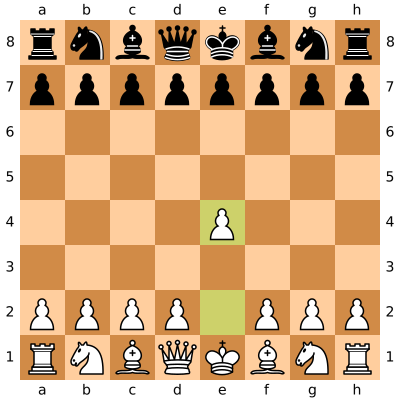

In [26]:
board = chess.Board()
board.push_san("e4")
board

In [39]:
first_game = chess.pgn.read_game(pgn)
board = chess.Board()

In [40]:
moves = first_game.main_line()
first_game.board().variation_san(moves)

'1. d4 d5 2. Nc3 Nf6 3. Bf4 e6 4. f3 Bb4 5. e3 O-O 6. Bg3 Nc6 7. f4 Ne4 8. Ne2 Ba5 9. Qd3 Nb4 10. Qd1 Nc6 11. Qd3 Bd7 12. a3 Qf6 13. O-O-O Qf5 14. Be1 Qg6 15. h3 a6 16. g4 Rad8 17. Bg2 Nxc3 18. Nxc3 Qxd3 19. Rxd3 Bb6 20. Na4 Ne5 21. fxe5 Bxa4 22. c3 Bb5 23. Rd1 Be2 24. Rd2 Bc4 25. Kc2 c5 26. a4 cxd4 27. exd4 a5 28. Bh4 Rc8 29. Bf1 Bd8 30. Bxd8 Rfxd8 31. Rf2 b6 32. b3 Bxf1 33. Rhxf1 Rc7 34. g5 g6 35. h4 Rdc8 36. Rf3 Kg7 37. Re1 h6 38. Rh3 Rh8 39. gxh6+ Rxh6 40. Reh1 Rh5 41. Rf3 Rf5 42. Rfh3 Rf2+ 43. Kd3 Rb2 44. h5 Rxb3 45. Kc2 Rb4 46. hxg6 Rxa4 47. gxf7 Rxf7 48. Rh7+ Kf8 49. Rxf7+ Kxf7 50. Rh7+ Kg6 51. Rb7 Ra2+ 52. Kb3 Rg2 53. Rxb6 Kf5 54. Ra6 Rf2 55. Rxa5 Ke4 56. Ra6 Kf5 57. Ra8 Rf4 58. Re8 Rh4 59. Rf8+ Kg5 60. Rf6 Rh6 61. Rxh6 Kxh6 62. c4 Kg5 63. c5 Kf4 64. c6 Ke4 65. c7 Kxd4 66. c8=Q'

Printing the move and the board for one game

In [41]:
node = first_game
while node.variations:
    next_node = node.variation(0)
    print(node.board().san(next_node.move))
    board.push_san(node.board().san(next_node.move))
    print(board)
    node = next_node

d4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
d5
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
Nc3
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
Nf6
r n b q k b . r
p p p . p p p p
. . . . . n . .
. . . p . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
Bf4
r n b q k b . r
p p p . p p p p
. . . . . n . .
. . . p . . . .
. . . P . B . .
. . N . . . . .
P P P . P P P P
R . . Q K B N R
e6
r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. . . P . B . .
. . N . . . . .
P P P . P P P P
R . . Q K B N R
f3
r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. . . P . B . .
. . N . . P . .
P P P . P . P P
R . . Q K B N R
Bb4
r n b q k . . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. b . P . B 

c6
. . . . . . . .
. . . . . . . .
. . P . p . . .
. . . p P . . .
. . . P . k . .
. K . . . . . .
. . . . . . . .
. . . . . . . .
Ke4
. . . . . . . .
. . . . . . . .
. . P . p . . .
. . . p P . . .
. . . P k . . .
. K . . . . . .
. . . . . . . .
. . . . . . . .
c7
. . . . . . . .
. . P . . . . .
. . . . p . . .
. . . p P . . .
. . . P k . . .
. K . . . . . .
. . . . . . . .
. . . . . . . .
Kxd4
. . . . . . . .
. . P . . . . .
. . . . p . . .
. . . p P . . .
. . . k . . . .
. K . . . . . .
. . . . . . . .
. . . . . . . .
c8=Q
. . Q . . . . .
. . . . . . . .
. . . . p . . .
. . . p P . . .
. . . k . . . .
. K . . . . . .
. . . . . . . .
. . . . . . . .


In [42]:
second_game = chess.pgn.read_game(pgn)
board = chess.Board()
moves = second_game.main_line()
second_game.board().variation_san(moves)
node = second_game
while node.variations:
    next_node = node.variation(0)
    print(node.board().san(next_node.move))
    board.push_san(node.board().san(next_node.move))
    print(board)
    node = next_node

d4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
e5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
c3
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . P . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
exd4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . p . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
cxd4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
Nf6
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
Nf3
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . N . .
P P . . P P P P
R N B Q K B . R
d5
r n b q k b . r
p p p . . p p p
. . . . . n . .
. . . p . . . .
. . . P . 

Following there is an example of how to print a hierarchical chart 
https://plot.ly/python/tree-plots/

In [78]:
import plotly.plotly as py
import plotly.graph_objs as go

import igraph
from igraph import *
import plotly
igraph.__version__

'0.7.1'

In [79]:
nr_vertices = 25
v_label = map(str, range(nr_vertices))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None] 

labels = v_label

In [80]:
lines = go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   )
dots = go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='',
                  marker=dict(symbol='dot',
                                size=18, 
                                color='#6175c1',    #'#DB4551', 
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  )

In [81]:
def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = go.Annotations()
    for k in range(L):
        annotations.append(
            go.Annotation(
                text=labels[k], # or replace labels with a different list for the text within the circle  
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations  

In [82]:
axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

layout = dict(title= 'Tree with Reingold-Tilford Layout',  
              annotations=make_annotations(position, v_label),
              font=dict(size=12),
              showlegend=False,
              xaxis=go.XAxis(axis),
              yaxis=go.YAxis(axis),          
              margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest',
              plot_bgcolor='rgb(248,248,248)'          
              )

In [86]:
# data=go.Data([lines, dots])
fig=dict(data=data, layout=layout)
fig['layout'].update(annotations=make_annotations(position, v_label))
fig = go.Figure(data=Data)
plotly.offline.iplot(fig, filename='Tree-Reingold-Tilf')

NameError: name 'Data' is not defined

another example in this link: https://plot.ly/~empet/14305/a-tree-with-improved-walker-layout-1/#plot